# Feature Selection
## Topics for this notebook
1. Clinical context  
2. Read in CSV file
3. Correct the data types for the model  
4. Spitting the data between training and testing sets
5. Oversampling to make the training set more balanced  
6. Feature selection using a wrapper method
7. Feature selection using an embedded method 

## Clinical context
For this notebook we will be building a model to predict hospital death based on data from an intensive care unit (ICU). Predicting patient death in the ICU is extremely important because determining which patients need attention immediately can help to prioritize care in a way that prevents as many deaths as possible. As a basis for this model we will be selecting many of the same features used by the Apache Algorithm. The Apache Algorithm was also created to predict patient death in the ICU and should serve as a good starting point for our model. Due to some missing data, certain features from the Apache Algorithm have been excluded from our model. Also, in an attempt to increase the performance of our model new features have been added that are not part of the Apache Algorithm.   

## Read in CSV file 

In [1]:
#install and load required libraries/packages 
install.packages("rlang")
install.packages("readr")
library (rlang)
library (readr)

#location of raw csv file on github repository 
urlfile="https://raw.githubusercontent.com/e-cui/ENABLE-HiDAV-Online-Modules/master/Data%20Mining%20Modules/csv_files/t.csv"

#Read the CSV file into a data frame called t 
t<-read_csv(url(urlfile))

#print
print("CSV file loaded sucessfully")

package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Aaron\anaconda3\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\Aaron\anaconda3\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"Warning message:
"restored 'rlang'"


The downloaded binary packages are in
	C:\Users\Aaron\AppData\Local\Temp\RtmpAD9Lcm\downloaded_packages
package 'readr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'readr'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Aaron\anaconda3\Lib\R\library\00LOCK\readr\libs\x64\librcon.lib to C:\Users\Aaron\anaconda3\Lib\R\library\readr\libs\x64\librcon.lib: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Aaron\anaconda3\Lib\R\library\00LOCK\readr\libs\x64\readr.dll to C:\Users\Aaron\anaconda3\Lib\R\library\readr\libs\x64\readr.dll: Permission denied"Warning message:
"restored 'readr'"


The downloaded binary packages are in
	C:\Users\Aaron\AppData\Local\Temp\RtmpAD9Lcm\downloaded_packages


Warning message:
"package 'rlang' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Parsed with column specification:
cols(
  hospital_death = col_double(),
  temp_apache = col_double(),
  map_apache = col_double(),
  h1_heartrate_max = col_double(),
  d1_resprate_max = col_double(),
  sodium_apache = col_double(),
  d1_potassium_max = col_double(),
  d1_creatinine_max = col_double(),
  d1_hematocrit_max = col_double(),
  wbc_apache = col_double(),
  gcs_eyes_apache = col_double(),
  gcs_motor_apache = col_double(),
  age = col_double(),
  pre_icu_los_days = col_double(),
  bmi = col_double(),
  intubated_apache = col_double(),
  sepsis = col_double(),
  cardiovascular_diagnosis = col_double()
)


[1] "CSV file loaded sucessfully"


## Change data type to fit the model 
- In order for the model to behave properly the correct data types must be assigned to each of our variables. 
- One issue with using CSV files is that they do not specify the data type so this step is often required before extensive data manipulation. 

In [2]:
#change categorical variables to factor data type
#data_frame$column_name is used to refer to a specific column
t$hospital_death<- as.factor(t$hospital_death)
t$sepsis<- as.factor(t$sepsis)
t$cardiovascular_diagnosis<- as.factor(t$cardiovascular_diagnosis)
t$intubated_apache<- as.factor(t$intubated_apache)
t$gcs_eyes_apache<- as.factor(t$gcs_eyes_apache)
t$gcs_motor_apache<- as.factor(t$gcs_motor_apache)

#change to numeric variables to numeric data type 
t$temp_apache<- as.numeric(t$temp_apache)
t$map_apache<- as.numeric(t$map_apache)
t$h1_heartrate_max<- as.numeric(t$h1_heartrate_max)
t$d1_resprate_max<- as.numeric(t$d1_resprate_max)
t$d1_potassium_max<- as.numeric(t$d1_potassium_max)
t$d1_creatinine_max<- as.numeric(t$d1_creatinine_max)
t$d1_hematocrit_max<- as.numeric(t$d1_hematocrit_max)
t$sodium_apache<- as.numeric(t$sodium_apache)
t$wbc_apache<- as.numeric(t$wbc_apache)
t$age<- as.numeric(t$age)
t$pre_icu_los_days<- as.numeric(t$pre_icu_los_days)
t$bmi<- as.numeric(t$bmi)

#check all variable data types to make sure they are correct
str(t)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	91713 obs. of  18 variables:
 $ hospital_death          : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 1 ...
 $ temp_apache             : num  39.3 35.1 36.7 34.8 36.7 36.6 35 36.6 36.9 36.3 ...
 $ map_apache              : num  40 46 68 60 103 130 138 60 66 58 ...
 $ h1_heartrate_max        : num  119 114 96 100 89 83 79 118 82 96 ...
 $ d1_resprate_max         : num  34 32 21 23 18 32 38 28 24 44 ...
 $ sodium_apache           : num  134 145 138 138 138 ...
 $ d1_potassium_max        : num  4 4.2 4.25 5 4.25 ...
 $ d1_creatinine_max       : num  2.51 0.71 1.49 1.49 1.49 ...
 $ d1_hematocrit_max       : num  27.4 36.9 34.5 34 34.5 ...
 $ wbc_apache              : num  14.1 12.7 10.5 8 15.5 ...
 $ gcs_eyes_apache         : Factor w/ 4 levels "1","2","3","4": 3 1 3 4 1 4 4 4 4 4 ...
 $ gcs_motor_apache        : Factor w/ 6 levels "1","2","3","4",..: 6 3 6 6 1 6 6 6 6 6 ...
 $ age                     : num  68 77 25 81 19 67 59 70

## Split the data frame into separate training and testing data frames
- Splitting the data in this manner is important because the model must be tested on data that it has never seen before. 
- When splitting the data the training set should be larger than the testing to allow for more accurate predictions. 

In [3]:
#install and load required libraries/packages 
install.packages("caTools")
library(caTools)

#75% of the sample size
smp_size <- floor(0.75 * nrow(t))

#set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(t)), size = smp_size)

#create a training data frame and a testing data frame 
train1 <- t[train_ind, ]
test1 <- t[-train_ind, ]

#print
print("Training and testing data sets created")

package 'caTools' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caTools'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Aaron\anaconda3\Lib\R\library\00LOCK\caTools\libs\x64\caTools.dll to C:\Users\Aaron\anaconda3\Lib\R\library\caTools\libs\x64\caTools.dll: Permission denied"Warning message:
"restored 'caTools'"


The downloaded binary packages are in
	C:\Users\Aaron\AppData\Local\Temp\RtmpeArY5f\downloaded_packages


Warning message:
"package 'caTools' was built under R version 3.6.3"

## Oversample the minority outcome to balance the training data frame (not always necessary)  
- Oversampling was necessary for this case since death is much less common in the ICU than recovery. 
- Without oversampling our algorithm may predict that no patient would die. 

In [4]:
#install and load required libraries/packages 
install.packages("ROSE")
library(ROSE)

#oversample the minority outcome to correct for data imbalance
data.rose <- ROSE(hospital_death~., p = 0.4, data=test1, seed=3)$data

#show how many of each outcome in oversampled data 
table(data.rose$hospital_death)

package 'ROSE' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Aaron\AppData\Local\Temp\RtmpeArY5f\downloaded_packages


Warning message:
"package 'ROSE' was built under R version 3.6.3"Loaded ROSE 0.0-3




    0     1 
13840  9089 

## Backward feature selection using recursive feature elimination (wrapper method)
- Backward feature selection starts with all the variables included in the model. 
- The model is run many times as the number of feature are reduced. 
- After completion, backward feature selection will specify the optimal number of features for your model. 

package 'mlbench' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'mlbench'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Aaron\anaconda3\Lib\R\library\00LOCK\mlbench\libs\x64\mlbench.dll to C:\Users\Aaron\anaconda3\Lib\R\library\mlbench\libs\x64\mlbench.dll: Permission denied"Warning message:
"restored 'mlbench'"


The downloaded binary packages are in
	C:\Users\Aaron\AppData\Local\Temp\RtmpeArY5f\downloaded_packages
package 'caret' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caret'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Aaron\anaconda3\Lib\R\library\00LOCK\caret\libs\x64\caret.dll to C:\Users\Aaron\anaconda3\Lib\R\library\caret\libs\x64\caret.dll: Permission denied"Warning message:
"restored 'caret'"


The downloaded binary packages are in
	C:\Users\Aaron\AppData\Local\Temp\RtmpeArY5f\downloaded_packages
package 'randomForest' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'randomForest'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Aaron\anaconda3\Lib\R\library\00LOCK\randomForest\libs\x64\randomForest.dll to C:\Users\Aaron\anaconda3\Lib\R\library\randomForest\libs\x64\randomForest.dll: Permission denied"Warning message:
"restored 'randomForest'"


The downloaded binary packages are in
	C:\Users\Aaron\AppData\Local\Temp\RtmpeArY5f\downloaded_packages
package 'e1071' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'e1071'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Aaron\anaconda3\Lib\R\library\00LOCK\e1071\libs\x64\e1071.dll to C:\Users\Aaron\anaconda3\Lib\R\library\e1071\libs\x64\e1071.dll: Permission denied"Warning message:
"restored 'e1071'"


The downloaded binary packages are in
	C:\Users\Aaron\AppData\Local\Temp\RtmpeArY5f\downloaded_packages


Warning message:
"package 'e1071' was built under R version 3.6.3"Warning message:
"package 'mlbench' was built under R version 3.6.3"Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin




Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD  KappaSD Selected
         2   0.7013 0.3601   0.008034 0.017265         
         3   0.7315 0.4250   0.009331 0.018976         
         4   0.7434 0.4531   0.008350 0.017410         
         5   0.7673 0.5061   0.009896 0.021378         
         6   0.7850 0.5452   0.004207 0.008868         
         7   0.7945 0.5656   0.004963 0.010398         
         8   0.7981 0.5738   0.005084 0.010694         
         9   0.8022 0.5828   0.005640 0.011749         
        10   0.8076 0.5945   0.005759 0.011989         
        11   0.8091 0.5967   0.005788 0.012383         
        12   0.8136 0.6064   0.004732 0.010149         
        13   0.8152 0.6094   0.007190 0.015274         
        14   0.8180 0.6156   0.006307 0.013492         
        15   0.8209 0.6216   0.006690 0.014862         
        16   0.8218 0.6239   0.0072

[1] "temp_apache"              "pre_icu_los_days"        
 [3] "wbc_apache"               "age"                     
 [5] "gcs_motor_apache"         "d1_creatinine_max"       
 [7] "h1_heartrate_max"         "d1_potassium_max"        
 [9] "d1_resprate_max"          "gcs_eyes_apache"         
[11] "cardiovascular_diagnosis" "sepsis"                  
[13] "map_apache"               "sodium_apache"           
[15] "intubated_apache"         "d1_hematocrit_max"       
[17] "bmi"

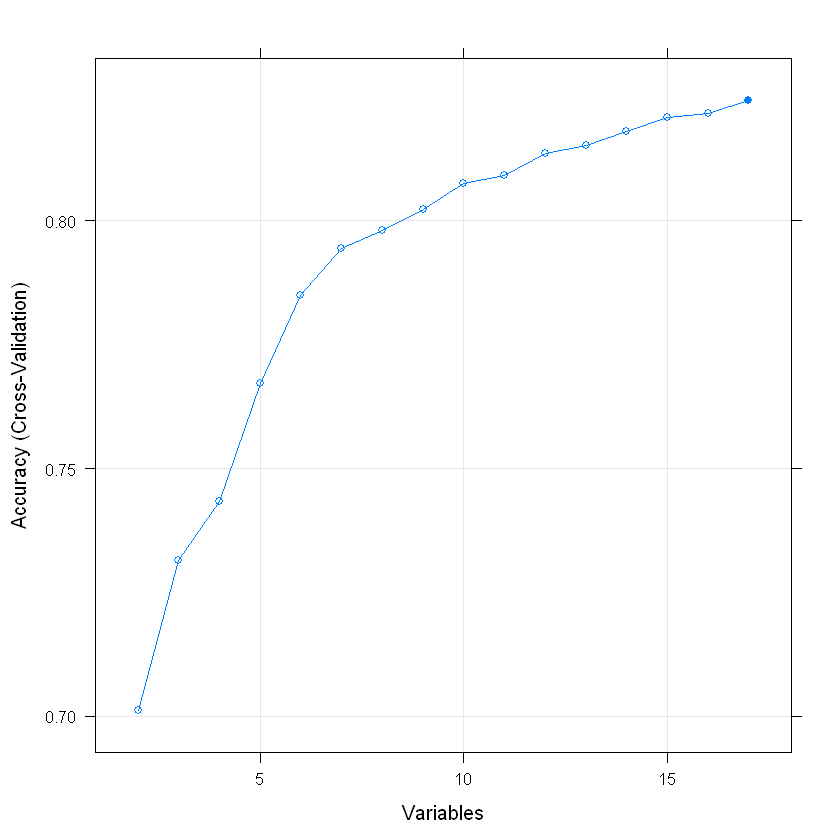

In [5]:
#feature selection using recursive feature elimination(rfe) 
#backward feature selection starts with all features then reduces the number of features 
#install and load required packages/libraries 
install.packages("mlbench")
install.packages("caret")
install.packages("randomForest")
install.packages("e1071")
library(e1071)
library(mlbench)
library(caret)
library(randomForest)

#establish training parameters
rfe_training <- rfeControl(functions=rfFuncs, method="cv", number=10)

#run the rfe model using the oversampled training data 
rfe <- rfe(data.rose[,2:18], data.rose[,1], sizes=c(2:18), rfeControl=rfe_training)
print(rfe)

#show variable rank
predictors(rfe) 

#display graph that highlights the most accurate number of features
plot(rfe, type=c("g", "o"))

## Feature selection using a random forest algorithm (embedded method)
- Random forest automatically selects features for the decision trees that it uses to make predictions. 
- The different decision trees are also created using slightly different variables and features for each tree resulting in a forest where each tree behaves in a unique manner. 

In [6]:
#install and load required libraries/packages 
install.packages("mlbench")
install.packages("caret")
install.packages("randomForest")
install.packages("e1071")
library(e1071)
library(mlbench)
library(caret)
library(randomForest)

#establish the training parameters 
t_training<- trainControl(method = "repeatedcv", number=10, repeats=3)
seed<- 7
metric<- "Accuracy"
set.seed(seed)
mtry<- sqrt(ncol(data.rose))
tunegrid<-expand.grid(.mtry=mtry)

#train the random forest algorithm on the oversampled training data 
#the oversampled training data frame is called data.rose 
#the outcome variable is hospital death
t_model<- train(hospital_death~., data=data.rose, method="rf", metric=metric, tuneGrid=tunegrid, trControl=t_training)

#show the results of model training
print(t_model)

#apply the trained model to the unseen testing data frame and store the results as z  
z<- predict(t_model, test1)

#look at the results of running the model with unseen test data using a confusion matrix 
confusionMatrix(z, test1$hospital_death)

#visualize variable importance 
variable_importance<- varImp(t_model)
print(variable_importance)

Warning message:
"package 'mlbench' is in use and will not be installed"Warning message:
"package 'caret' is in use and will not be installed"Warning message:
"package 'randomForest' is in use and will not be installed"Warning message:
"package 'e1071' is in use and will not be installed"

Random Forest 

22929 samples
   17 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 20636, 20637, 20636, 20636, 20636, 20636, ... 
Resampling results:

  Accuracy   Kappa    
  0.8242985  0.6276221

Tuning parameter 'mtry' was held constant at a value of 4.242641


Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 19556   857
         1  1406  1110
                                          
               Accuracy : 0.9013          
                 95% CI : (0.8974, 0.9051)
    No Information Rate : 0.9142          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.4414          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9329          
            Specificity : 0.5643          
         Pos Pred Value : 0.9580          
         Neg Pred Value : 0.4412          
             Prevalence : 0.9142          
         Detection Rate : 0.8529          
   Detection Prevalence : 0.8903          
      Balanced Accuracy : 0.7486          
                                          
       'Positive' Class : 0               
                  

rf variable importance

  only 20 most important variables shown (out of 23)

                          Overall
temp_apache               100.000
pre_icu_los_days           74.702
wbc_apache                 64.209
age                        56.157
d1_creatinine_max          55.294
d1_resprate_max            53.390
gcs_motor_apache6          51.879
h1_heartrate_max           49.595
d1_potassium_max           49.199
map_apache                 43.511
sodium_apache              41.378
d1_hematocrit_max          39.443
bmi                        39.275
gcs_eyes_apache4           33.128
cardiovascular_diagnosis1  17.759
intubated_apache1          17.291
sepsis1                    11.343
gcs_eyes_apache3            7.681
gcs_motor_apache5           4.184
gcs_eyes_apache2            2.209


## This concludes the feature selection part of the course
- The following key questions were addressed during this notebook and the accompanying video lecture:
1. What are the three main types of methods used for feature selection?
2. What are the advantages and disadvantages of the feature selection approaches mentioned?

 

